In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import operator
import langid
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [4]:
train = pd.read_csv('./train.csv')

In [5]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
no_insincere = train[train['target']==1].target.count()
no_sincere = train[train['target']==0].target.count()

print('No. of insincere questions:', no_insincere)
print('No. of sincere questions:', no_sincere)
print('% of insincere questions:', train.target.mean())
print('Null score:', 1- train.target.mean())

No. of insincere questions: 80810
No. of sincere questions: 1225312
% of insincere questions: 0.06187017751787352
Null score: 0.9381298224821265


In [7]:
# Storing basic stats about the data in a dataframe, might provide some insights later.
basic_stats = pd.DataFrame([train.shape[0], no_insincere, no_sincere, train.target.mean(), 1- train.target.mean()], 
                           index=['no_of_questions', 'no_of_insincere', 'no_of_sincere',  '%_insinere', 'null_score'], columns=['basic_stats']).T

basic_stats

,no_of_questions,no_of_insincere,no_of_sincere,%_insinere,null_score
basic_stats,1306122.0,80810.0,1225312.0,0.06187,0.93813


In [8]:
train['char_length'] = train.question_text.map(lambda x: len(x))

In [9]:
train.head()

,qid,question_text,target,char_length
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77


In [15]:
c_max = train.char_length.max()
c_min = train.char_length.min()
c_mean = train.char_length.mean()
c_std = train.char_length.std()
print('Max question length:', c_max)
print('Min question length:', c_min)
print('Mean question length:', c_mean)
print('STD question length:', c_std)

Max question length: 1017
Min question length: 1
Mean question length: 70.67883551459971
STD question length: 38.78427671665139


In [16]:
# question length could be a indicator of insincerity.
train[train.char_length < 5]

,qid,question_text,target,char_length,log_c_length
78445,0f5a41d6752d5d667895,Is,1,3,1.098612
299304,3a9ae962f1094242e36f,If,1,3,1.098612
420816,527aac2ce6f12f789fe5,"""",1,1,0.000000
792939,9b5f4ae97ad53ac06ba6,Do,1,3,1.098612
995257,c309469a202434b5f1d2,W,1,1,0.000000


In [18]:
train[train.char_length > 700]

,qid,question_text,target,char_length,log_c_length
163583,1ffca149bd0a19cd714c,What is [math]\overbrace{\sum_{\vartheta=8}^{\...,1,878,6.777647
443216,56da6b6875d686b48fde,What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan...,1,1017,6.924612
522266,663c7523d48f5ee66a3e,"In ""Star Trek 2013"" why did they :\n\n*Spoiler...",0,752,6.622736


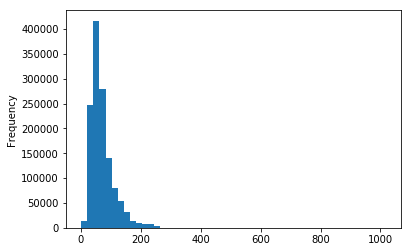

In [21]:
train.char_length.plot.hist(bins=50)

In [19]:
train['log_c_length'] = train.char_length.map(lambda x: np.log(x))

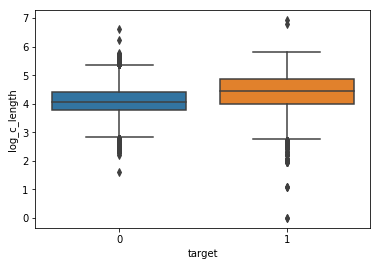

In [26]:
sns.boxplot(train.target, train.log_c_length)